<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/GPU_vs_CPU_benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [ ]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()


True

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
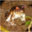

In [ ]:
x_train[0]

In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

#Data Visualization

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
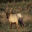

In [ ]:
x_train[3]

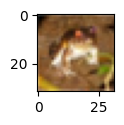

In [ ]:
plot_sample(0)

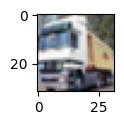

In [ ]:
plot_sample(1)

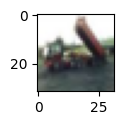

In [ ]:
plot_sample(2)

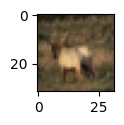

In [ ]:
plot_sample(3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train[0][0]

6

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
X_train_scaled = x_train / 255
X_test_scaled  =  x_test / 255

In [ ]:
y_train_categotical = to_categorical(y_train, num_classes = 10)
y_train_categotical


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test_categorical = to_categorical (y_test, num_classes = 10)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

#building the model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3072, activation = 'relu'),
    keras.layers.Dense(3072, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])


model.compile(
    optimizer = 'SGD',
    loss  = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train_categotical, epochs= 50)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3081 - loss: 1.9310
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4225 - loss: 1.6414
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4520 - loss: 1.5554
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4823 - loss: 1.4815
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4991 - loss: 1.4288
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5124 - loss: 1.3894
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5262 - loss: 1.3472
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5402 - loss: 1.3115
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5530 - loss: 1.2774
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5652 - loss: 1.2457
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5767 - loss: 1.2197
Epoch 12/50
1563/1563 ━━━━━━

In [ ]:
output = model.predict(X_test_scaled)[1]
output

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.9790181 , 0.93495864, 0.6261187 , 0.00779861, 0.01751175,
       0.02964899, 0.00142681, 0.50751215, 0.9993831 , 0.9978022 ],
      dtype=float32)

In [ ]:
#to find the max number in the array
np.argmax(output)

8

In [ ]:
classes[8]

'ship'

In [ ]:
y_test[1]

array([8], dtype=uint8)

In [ ]:
model.evaluate(X_test_scaled , y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5674 - loss: 1.5550


[1.5600236654281616, 0.5706999897956848]

In [ ]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Measure training time on a CPU


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categotical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3068 - loss: 1.9264
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Lets measure training time on a GPU (I've NVIDIA Titan RTX)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categotical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3080 - loss: 1.9289
8.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#Exercise to practice GPU and CPU

In [20]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt



In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



In [22]:
x_train.shape

(60000, 28, 28)

Data visualization

In [23]:
def show_image(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

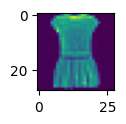

In [24]:
show_image(3)

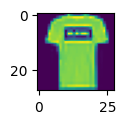

In [25]:
show_image(1)

In [26]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
         23,  41,  59, 111, 134, 138, 226, 202, 217,  22,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  35, 179,
        195, 182, 225, 198, 241, 177, 199, 205, 210,  26,   0,   1,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
          0,   0,   0,   0,   0, 235, 243, 198, 119,   0,   3,   1,   3,
          4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   5,   0,   0,   0, 170, 252, 181, 182,   0,   0,   0,   0,
          0,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   4,   0,  76, 255, 183, 219,   9,   0,   0,  42,
        191, 164],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2,   0,   0, 237, 198, 204,  75,  47, 221, 221,
        238,  25],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   2,   1,   0,   0, 209, 212, 229, 255, 254, 232, 227,
        174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0, 210, 255,  87, 101, 230, 238,
        105,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   4,   1,   0,   1, 250, 236,   0,   0,   0, 224, 233,
         20,   0],
       [  0,   0,   0,   0,   0,   1,   3,   4,   4,   2,   0,   0,   0,
          1,   0,   2,   0,   0, 204, 185,   0,   0,   0,   6, 227, 202,
          0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0, 173, 159,   0,   0,   2,   0,  10, 237, 153,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  40, 138,  21,   0,   0,   2,
          0,   8,   0, 132, 195,   0,   0,   0,   0,   0,   8, 240, 118,
          0,   1],
       [  5,   6,   4,   0, 132, 232, 208, 208, 241, 217,   0,   0,   0,
          1,   0,  29, 217,  35,   0,   9,   0,   2,   0,  25, 238,  58,
          0,   2],
       [  0,   0,   0,   0, 181, 255, 231, 233, 219, 238,  77,   0,   0,
          0,   0, 196, 145,   0,   0,   0,   0,   2,   0,  49, 228,   0,
          0,   2],
       [ 62,  92,   8,   0, 207, 255, 216, 198, 189, 208, 221,   0,   0,
          0, 177, 239,  19,   0,   0,   0,   0,   2,   0,  64, 218,   0,
          0,   3],
       [ 96, 249, 223, 211, 237, 243, 211, 228, 255, 252, 255, 138,  38,
        175, 242, 173,   0,   0,   0,   0,   0,   2,   0,  89, 204,   0,
          0,   2],
       [  0, 197, 240, 240, 237, 219, 222, 244, 235, 243, 244, 255, 255,
        234, 233,  45,   0,   2,   0,   0,   0,   2,   0, 105, 188,   0,
          0,   0],
       [  0, 165, 253, 224, 229, 242, 244, 232, 239, 242, 243, 237, 230,
        230, 207,   0,   0,   1,   0,   0,   0,   9,   0, 120, 165,   0,
          8,   0],
       [  0,  45, 255, 252, 253, 241, 22

In [27]:
x_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   1,   0,   0,   1,   1,   0,   0,   0,   0,  58,   0,  39,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   0,   0,   0,   0,   0,   0,   0,  64, 109, 146, 192, 193,
          7,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,  94,  38,  99, 209, 183, 229, 192, 142,  48,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,  41,  45, 158, 146, 164, 114,  51,   1,  53, 105,  42,  36,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,
         68,  44,  30,  59, 172, 146,   0,  22,   0,  13, 103, 111, 103,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   1,   0,  22,
         61,  88, 152, 255,  71,   0,   0,   0,   0,  35,  85, 112, 201,
         44,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,
         62, 154,  62,   0,   0,   0,   0,   0,   0,  54,  99,  61, 106,
         51,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   9,   1,   0,   0,   1,   0,  79,  82,  47,  33,
         58,  50],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          3,   1,   3,   9,   3,   0,   0,   1,   0, 100,  88,  48,  35,
         70,  54],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   1,   0,   0, 111, 195, 119,  29,
         58,  45],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   3,   3,   0,   0,  91, 146, 171,  16,
         93,  35],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  48,  45,   3,  79,  87,
         99,   6],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   0, 119, 137,  33,  96,  77,  13,
         45,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  32, 160, 164, 142, 116,  79,  82,  39,
         39,   0],
       [  0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          3,   4,  10,   0,  41, 180, 142, 171,   1,   0,   0,  48,  73,
         16,   0],
       [  0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,
          0,   3,   0,  27, 155, 114, 169,   0,   0,   0,   0,  47,  76,
          6,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0, 155, 129, 160,   0,   0,   0,   0,   0,  45,  96,
          0,   0],
       [  0,   0,   0,   0,   1,   0,  16,  39,  64,   0,   0,   0,   0,
          0,   0, 129, 151, 175,   0,   0,   0,   4,   4,   0,  48, 116,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  58,  87,  73,  10,   0,   0,   0,
          0,  27, 187, 195,   0,   0,   0,   0,   3,   1,   0,  47, 146,
          0,   0],
       [  1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 181, 225,  45,   0,   0,   0,   0,   0,   1,   0,  45, 186,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 183, 210,  90,   0,   0,   0,
        126, 253, 142,   0,   0,   0,   0,   0,   0,   1,   0,  48, 203,
          0,   0],
       [ 64,  58,  45,  27,  16,   9,   1, 175, 245, 204,  22,   0,  70,
        236, 190,   6,   0,   0,   0,   0,   0,   0,   0,   0,  50, 196,
          0,   0],
       [ 96, 128, 149, 163, 158, 140, 13

In [28]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [29]:
classes = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [31]:
x_train = x_train /255
x_test = x_test / 255

In [32]:
from keras.utils import to_categorical

In [33]:
y_train_categorical = to_categorical(y_train, num_classes = 10 )

In [34]:
y_test_categorical = to_categorical(y_test, num_classes = 10 )

Building the Model

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(2352, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


model.fit(x_train, y_train_categorical, epochs = 10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7917 - loss: 0.5828
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8680 - loss: 0.3642
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8803 - loss: 0.3246
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8905 - loss: 0.2966
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9001 - loss: 0.2723
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9026 - loss: 0.2615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9057 - loss: 0.2501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.2342
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9159 - loss: 0.2248
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9194 - loss: 0.2149


In [46]:
np.argmax(model.predict(x_test)[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1

In [47]:
y_test[2]

1

In [48]:
model.evaluate(x_test, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8855 - loss: 0.3550


[0.34759342670440674, 0.886900007724762]